# Project Three Notebook
By [Erica Dumore](https://www.linkedin.com/in/erica-dumore-62b306a2/) 


## Is this restaurant up to code?

This project takes generated data from [data.gov](data.gov) that evaluated different restaurants located throughout San Francisco, California and reported their health inspection score. The city released this data publically, reporting the name of the restaurant, the date of the inspection, the reason for the inspection, the inspection score received, a description of any violation found, and the risk category the restaurant was placed in as a result. 

This project focuses on two specific categories, inspection score and inspection type, found within [this csv file](restaurant.csv) which can be downloaded from this [link](https://catalog.data.gov/dataset/food-inspections-lives-standard), to predict whether our target, the inspection score, can be predicted by our features, the different types of inspections being preformed. Through the use of linear regression graphs, we will be able to see what correlation exists between our target and our features. Based on patterns generated, we will be able to predict whether inspection scores correlate with the different types of inspections being preformed. 

The idea behind this project was that certain inspection types may indicate what inspection scores will be received. For example, as a hypothesis, a new ownership inspection may often result in a higher inspection score then foodborne illness investigation, which may typically result in a low inspection score. Or a scheduled inspection may result in higher inspection scores than an unscheduled inspection.

## Process

This project took a lot of trial and error. The first step was deciding what my target and features were going to be. I knew I wanted the inspection scores to be my target, but deciding what would be my features was a more difficult task. Ultimately I decided to use the different types of inspections being performed because I saw them as having prediction capabilities, which was the ultimate goal of this project. The different types of inspections were repetitively used and always influenced the overall inspection score. 

After I decided my target and my feature I created my first set of code utilizing the cvs file attached above. Once the data was input in my notebook I decided to clean my data so that the only columns and rows were those that would effect my linear regression graph and data analysis. This process is explained more thoroughly below under the Data Clean & Generate heading. 

The first time I created what I believed would be a sucessful prediction code I mistakenly generated individual cells for each different inspection type creating multiple linear graphs and individual data anaylsis feedback. Although these graphs were accurate and did provide me with accuracy feedback, they were too specific and did not provide me with any overall feedback of how all the different types of inspections correlated together influencing the final inspection scores. This was a more minor set back, as it did not require me to re-code my whole project but rather go back to where I had cleaned the data and recreate the linear regression part of my project. 

I walk you through my project, step by step, below under the heading Data Cleaning & Generating, discussing more problems I ran into, how I solved/moved past those problems, and my thoughts on the viability of this project.


In [679]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning & Generating

Below I have loaded the data collected and begun to feed it to the statistical model. Utilizing my target, inspection scores, and my features, types of inspections, specifically new ownership and unscheduled inspections. Here I have loaded my [csv file](restaurant.csv) from: https://catalog.data.gov/dataset/food-inspections-lives-standard 

As you go through the cells, I have listed the different steps I took to generate a linear regression graph and anaylze my data, you will see that in order to get to the final step I had to created dummy varibles for my features, the different types of inspections, so that they would all generate numeric values. This was the most difficult taste for me. The first time I attempted to generate the graph I had 'Type' listed in my code and it continued to generate an error response but I could not figure out why. After realizing that all responses needed to be in numeric values, I added the necessary lines of code to create the dummy variables, which was not a difficult task, and was able to fix the error response there. 

However, I then ran into more difficulties because this project required the cell be in a very specific order to run completely all the way through, otherwise the data would be incorrect or the code would signal an error screen. I had to play around with the order of my cells surrounding my dummy variables multiple times to ensure that the data was clean prior to creating the dummy variable, that I did not drop the dummy variable column 'Types' under after the dummy columns were created, that I did not rename the dummy columns until after the cell that contained the dummy variable code, and that I did not delete any NaN responses until I had finalized my data set. 

Renaming the feature columns, the different types of inspections, also presented a few hurdles. The code needed such accuracy I had difficulties finding where my errors were located. It kept telling me that one of the feature column names could not be found in the index so I would have to hunt back through to see if I had entered a punctuation mark wrong, put an extra space, or had misspelled something. This was more tedious then it was anything else but it resulted in numerous attempts of rewriting the line of code entirely. 

Once I had my data set all cleaned and had ran the two graphs on the two specific inspection types that I chose to focus on, new ownership & routine unscheduled inspections, I had to generate the model. The first time I generated the model, I wrote the line of code "model = ols("Score ~ Type", training).fit()" which I had no problems with prior to creating the dummy variables, but once I had created the dummy variables this line of code no longer seem to get my model to work and generated an error response. What ended up being the problem was that my feature columns names contained spaces. I then had to go back to my renaming cell and regenerate names for all of the feature columns that contained spaces in the name. After I did this and ran my code through from start to the model cell, it generated the model and provided accuracy information, as well as other analyzed data.

Overall, this project required the most trial and error on my part. A lot of it was because the lines of code are just so specific and I was overlooking common mistakes. Another reason is because of my data set choice. 


If I were to do this project again as a whole, I would chose a different data set, one with more data that is able to create more accurate predictions. This set of data was too small and too specific, it did not contain enough to make strong predictions. 

## Final Accurary/Real World Viability

To make this real world viable I would want to be able to generate a graph where all of the inspection types were on one graph to better be able to see how the types correspond with each other as a whole and not just between two of the features.

As is,  I do not believe this is not an accurate representation of the correlation between the two feature variables and thus is not an accurate prediction. Because the graphs and final analysis has been generated off of only two of the different types of inspection categories, rather than out of all of the additional types it is just a narrow view of the big picture. Although, even if this project was generated off of all of the different types of inspection categories, it still would not be extremely accurate because it is such a specific and narrow set of data that is not entirely conducive to predictions. With that being said, if I were to re-do this project I would chose a different set of data, one that is more predictable and offers more of a correlation.


In [680]:
# This is my raw data before cleaning it at all. 
raw_data_df = pd.read_csv('restaurant.csv', parse_dates=[0]) 
raw_data_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,90604,Taqueria Los Amigos,5300 Mission St.,San Francisco,CA,94112,NaN,NaN,NaN,NaN,90604_20170502,5/2/17 0:00,NaN,New Ownership,90604_20170502_103133,Foods not protected from contamination,Moderate Risk
1,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,1757_20170928,9/28/17 0:00,86.0,Routine - Unscheduled,1757_20170928_103131,Moderate risk vermin infestation,Moderate Risk
2,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,4864_20161206,12/6/16 0:00,84.0,Routine - Unscheduled,4864_20161206_103157,Food safety certificate or food handler card n...,Low Risk
3,79782,Deli 23,2449 23rd St,San Francisco,CA,94110,NaN,NaN,NaN,NaN,79782_20160503,5/3/16 0:00,92.0,Routine - Unscheduled,79782_20160503_103120,Moderate risk food holding temperature,Moderate Risk
4,76437,Sweetheart Cafe,909 Grant Ave,San Francisco,CA,94108,NaN,NaN,NaN,NaN,76437_20160329,3/29/16 0:00,76.0,Routine - Unscheduled,76437_20160329_103113,Sewage or wastewater contamination,High Risk


In [681]:
# I then used the .unique() feature to filter out the different inspection types.
print(raw_data_df["inspection_type"].unique())

['New Ownership' 'Routine - Unscheduled' 'Structural Inspection'
 'Reinspection/Followup' 'New Construction' 'Complaint'
 'Non-inspection site visit' 'Routine - Scheduled'
 'Foodborne Illness Investigation' 'Complaint Reinspection/Followup'
 'Special Event' 'New Ownership - Followup' 'Community Health Assessment'
 'Administrative or Document Review']


In [682]:
# I then used the drop feature to dropped the columns that did not apply to this project. 
raw_data_df = raw_data_df.drop([ 'business_id',
                                            'business_address',
                                            'business_city',
                                            'business_state',
                                            'business_postal_code',
                                            'business_latitude',
                                            'business_longitude',
                                            'business_location',
                                            'business_phone_number',
                                            'inspection_id',
                                            'inspection_date',
                                            'violation_id',
                                            'violation_description',
                                            'risk_category'
                                                                       ], 1)
raw_data_df.head()

,business_name,inspection_score,inspection_type
0,Taqueria Los Amigos,NaN,New Ownership
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled
3,Deli 23,92.0,Routine - Unscheduled
4,Sweetheart Cafe,76.0,Routine - Unscheduled


In [683]:
# I then used the renaming feature to renamed some of the columns.
raw_data_df = raw_data_df.rename(columns={
                                                        'business_name': 'Business', 
                                                        'inspection_score': 'Score',
                                                        'inspection_type': 'Type',
                                                     })
raw_data_df.head()

,Business,Score,Type
0,Taqueria Los Amigos,NaN,New Ownership
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled
3,Deli 23,92.0,Routine - Unscheduled
4,Sweetheart Cafe,76.0,Routine - Unscheduled


In [684]:
# I then utilized the dummies feature, adding the different types of inspections to the end of the data set as features
raw_data_df = pd.concat([raw_data_df, pd.get_dummies(raw_data_df['Type'])], axis=1)

raw_data_df.head()

,Business,Score,Type,Administrative or Document Review,Community Health Assessment,Complaint,Complaint Reinspection/Followup,Foodborne Illness Investigation,New Construction,New Ownership,New Ownership - Followup,Non-inspection site visit,Reinspection/Followup,Routine - Scheduled,Routine - Unscheduled,Special Event,Structural Inspection
0,Taqueria Los Amigos,NaN,New Ownership,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Deli 23,92.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sweetheart Cafe,76.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [685]:
# I then utilized the dropna feature to drop any non-numeral responses that appear in the data set as "NaN."
raw_data_df = raw_data_df.dropna()
raw_data_df.head()

,Business,Score,Type,Administrative or Document Review,Community Health Assessment,Complaint,Complaint Reinspection/Followup,Foodborne Illness Investigation,New Construction,New Ownership,New Ownership - Followup,Non-inspection site visit,Reinspection/Followup,Routine - Scheduled,Routine - Unscheduled,Special Event,Structural Inspection
1,Dar Bar Pakistani/Indian Cusine,86.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,DRAGON CITY BAKERY & CAFE,84.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Deli 23,92.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sweetheart Cafe,76.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,Jelly Donut,88.0,Routine - Unscheduled,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [686]:
# I then utilized the drop feature again to drop the 'Type' column because it was no longer needed since the dummies had been created
raw_data_df = raw_data_df.drop('Type', 1)

raw_data_df.head()

,Business,Score,Administrative or Document Review,Community Health Assessment,Complaint,Complaint Reinspection/Followup,Foodborne Illness Investigation,New Construction,New Ownership,New Ownership - Followup,Non-inspection site visit,Reinspection/Followup,Routine - Scheduled,Routine - Unscheduled,Special Event,Structural Inspection
1,Dar Bar Pakistani/Indian Cusine,86.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,DRAGON CITY BAKERY & CAFE,84.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Deli 23,92.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sweetheart Cafe,76.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,Jelly Donut,88.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [687]:
# I then renamed the dummy columns, which I had to do multiple times after I realized no spaces could exist

raw_data_df = raw_data_df.rename(columns={
                                                        'Administrative or Document Review': 'admin', 
                                                        'Community Health Assessment': 'health',
                                                        'Complaint Reinspection/Followup': 'comp_reinspect',
                                                        'Foodborne Illness Investigation': 'food',
                                                        'New Construction':'construction',
                                                        'New Ownership':'new_own',
                                                        'New Ownership - Followup':'new_followup',
                                                        'Non-inspection site visit':'site_visit',
                                                        'Reinspection/Followup':'reinspection',
                                                        'Routine - Scheduled':'scheduled',
                                                        'Routine - Unscheduled':'unscheduled',
                                                        'Special Event':'event',
                                                        'Structural Inspection':'structure'
                                                     })

raw_data_df.head()

,Business,Score,admin,health,Complaint,comp_reinspect,food,construction,new_own,new_followup,site_visit,reinspection,scheduled,unscheduled,event,structure
1,Dar Bar Pakistani/Indian Cusine,86.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,DRAGON CITY BAKERY & CAFE,84.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Deli 23,92.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sweetheart Cafe,76.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,Jelly Donut,88.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [688]:
# I then trained the model to make a linear regression where the target, Score, is numerical
score_lin_df = raw_data_df[[
                               'Score', 
                               'admin',
                               'health',
                               'Complaint',
                               'comp_reinspect',
                               'food',
                               'construction',
                               'new_own',
                               'new_followup',
                               'site_visit',
                               'reinspection',
                               'scheduled',
                               'unscheduled',
                               'event',
                               'structure'
                                            ]].copy()
score_lin_df.head()

,Score,admin,health,Complaint,comp_reinspect,food,construction,new_own,new_followup,site_visit,reinspection,scheduled,unscheduled,event,structure
1,86.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,84.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,92.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,76.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,88.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [689]:
# I then plotted my graphs using the two specific features I chose to compare

data = score_lin_df

data = data[data["Score"]<=100]

holdout = data.sample(frac=0.2)
training = data.loc[~data.index.isin(holdout.index)]

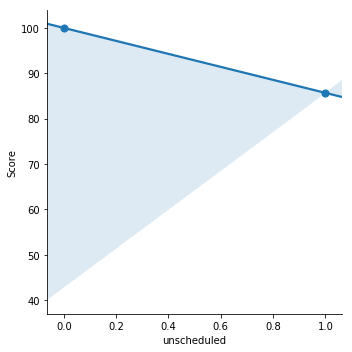

In [690]:
sns.lmplot(x="unscheduled", y="Score", data=training, x_estimator=np.mean, order=1)

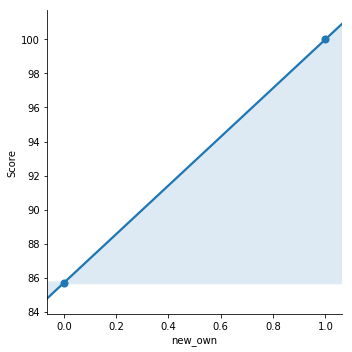

In [691]:
sns.lmplot(x="new_own", y="Score", data=training, x_estimator=np.mean, order=1)

In [692]:
# I then generating more results based off of the model to provide more information based off of the linear regression
model = ols("Score ~ unscheduled + new_own", training).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.407
Date:                Mon, 04 Dec 2017   Prob (F-statistic):              0.121
Time:                        19:19:25   Log-Likelihood:            -1.0984e+05
No. Observations:               30171   AIC:                         2.197e+05
Df Residuals:                   30169   BIC:                         2.197e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      61.8972      3.074     20.133      0.000      55.871      67.923
unscheduled    23.7945      3.075      7.739      0.000      17.768      29.821
new_own        38.1028      6.149      6.197      0.000      26.051      50.154
==============================================================================
Omnibus:                     2197.802   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2704.602
Skew:                          -0.718   Prob(JB):                         0.00
Kurtosis:                       3.296   Cond. No.                     9.16e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.2e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [693]:
# And finally I utilized SciKitLearn to check for my project for overall accuracy, which is very very low 
features_train = training.drop("Score", axis=1).as_matrix(columns=None)
labels_train = training["Score"].as_matrix(columns=None)

features_test = holdout.drop("Score", axis=1).as_matrix(columns=None)
labels_test = holdout["Score"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 7.86105242128e-05
Accuracy: 0.000279836245958
